#Preprocesamiento y calidad de datos.

##Base de datos de partida y carga de datos

Los datos se pueden descargar a través de la página web www.opendatalapalma.es, el portal de acceso a los datos públicos del Cabildo de La Palma.

In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import io
from google.colab import files
import itertools
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

from pylab import pcolor, show, colorbar, xticks, yticks

Leemos el fichero de fuente de datos, que previamente hemos importado.

In [2]:
df = pd.read_csv("Movimientos_sismicos.csv")
print(df)

             X        Y  OBJECTID_1  OBJECTID  Id  Date_  Time_  \
0     -17.8807  28.5661       70306       NaN NaN    NaN    NaN   
1     -17.8508  28.5584       70307       NaN NaN    NaN    NaN   
2     -17.8735  28.5719       70308       NaN NaN    NaN    NaN   
3     -17.8802  28.5656       70309       NaN NaN    NaN    NaN   
4     -17.8549  28.5499       70310       NaN NaN    NaN    NaN   
...        ...      ...         ...       ...  ..    ...    ...   
15557 -17.8804  28.6190       85865       NaN NaN    NaN    NaN   
15558 -17.8451  28.5525       85866       NaN NaN    NaN    NaN   
15559 -17.9003  28.6054       85867       NaN NaN    NaN    NaN   
15560 -17.8845  28.6263       85868       NaN NaN    NaN    NaN   
15561 -17.8634  28.5679       85869       NaN NaN    NaN    NaN   

                        DateTime_  ErrTime   RMS  ...    Qual  Author  \
0      2017/10/07 10:27:29.820+00     2.18  0.19  ...  m i ke     IGN   
1      2017/10/07 13:03:25.460+00     2.19  0.20 

Luego, en el datasets en estudio constan 15562 ejemplos diferentes con 32 variables.

Vamos a dividir nuestro conjunto de datos en dos partes una para entrenamiento (tuning) y otra para test. Para ello vamos a utilizar los datos de 2017 y la mitad de 2021 para entrenamiento y el resto de 2021 para los tests.  

In [3]:
 from sklearn.model_selection import train_test_split
 train, test = train_test_split(df, test_size = 0.30, shuffle = False)

 df = train
 print(df)

             X        Y  OBJECTID_1  OBJECTID  Id  Date_  Time_  \
0     -17.8807  28.5661       70306       NaN NaN    NaN    NaN   
1     -17.8508  28.5584       70307       NaN NaN    NaN    NaN   
2     -17.8735  28.5719       70308       NaN NaN    NaN    NaN   
3     -17.8802  28.5656       70309       NaN NaN    NaN    NaN   
4     -17.8549  28.5499       70310       NaN NaN    NaN    NaN   
...        ...      ...         ...       ...  ..    ...    ...   
10888 -17.7874  28.5651       81194       NaN NaN    NaN    NaN   
10889 -17.8338  28.5613       81195       NaN NaN    NaN    NaN   
10890 -17.8335  28.6025       81196       NaN NaN    NaN    NaN   
10891 -17.8251  28.5678       81197       NaN NaN    NaN    NaN   
10892 -17.8549  28.5660       81198       NaN NaN    NaN    NaN   

                        DateTime_  ErrTime   RMS  ...    Qual  Author  \
0      2017/10/07 10:27:29.820+00     2.18  0.19  ...  m i ke     IGN   
1      2017/10/07 13:03:25.460+00     2.19  0.20 

In [4]:
# reseteamos el index con el fin de no evitar problemas en la validación cruzada
df.reset_index(drop = True, inplace = True)
df.head()

,X,Y,OBJECTID_1,OBJECTID,Id,Date_,Time_,DateTime_,ErrTime,RMS,...,Qual,Author,OrigID,Magnitud,IntensMax,Localizaci,TipoMagnit,XUTM,YUTM,GlobalID
0,-17.8807,28.5661,70306,NaN,NaN,NaN,NaN,2017/10/07 10:27:29.820+00,2.18,0.19,...,m i ke,IGN,es2017mbfgp,1.6,NaN,NaN,mbLg,218191,3163304,NaN
1,-17.8508,28.5584,70307,NaN,NaN,NaN,NaN,2017/10/07 13:03:25.460+00,2.19,0.20,...,m i ke,IGN,es2017mbgkc,2.7,NaN,NaN,mbLg,221097,3162380,NaN
2,-17.8735,28.5719,70308,NaN,NaN,NaN,NaN,2017/10/07 20:09:58.790+00,2.33,0.16,...,m i ke,IGN,es2017mbjoj,1.7,NaN,NaN,mbLg,218912,3163930,NaN
3,-17.8802,28.5656,70309,NaN,NaN,NaN,NaN,2017/10/07 23:06:00+00,2.44,0.11,...,m i ke,IGN,es2017mblee,1.7,NaN,NaN,mbLg,218239,3163248,NaN
4,-17.8549,28.5499,70310,NaN,NaN,NaN,NaN,2017/10/08 01:23:02.150+00,1.93,0.17,...,m i ke,IGN,es2017mbmfb,2.6,NaN,NaN,mbLg,220674,3161448,NaN


Comprobamos los tipos y la cantidad de instacias que tenemos

In [5]:
#Forma y tipos de datos de los datos
print(df.shape)
print(df.dtypes)

(10893, 32)
X             float64
Y             float64
OBJECTID_1      int64
OBJECTID      float64
Id            float64
Date_         float64
Time_         float64
DateTime_      object
ErrTime       float64
RMS           float64
Latitude      float64
Longitude     float64
Smaj          float64
Smin          float64
Az              int64
Depth         float64
ErrDepth      float64
Ndef            int64
Nsta            int64
Gap             int64
mdist         float64
Mdist_        float64
Qual           object
Author         object
OrigID         object
Magnitud      float64
IntensMax     float64
Localizaci    float64
TipoMagnit     object
XUTM            int64
YUTM            int64
GlobalID      float64
dtype: object


Comprobamos de todas las variables, que subconjunto son númericas.

In [6]:
#Se seleccionan columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])      #Se crea un data frame nuevo que seleccione las columnas de tipo numérico.
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['X' 'Y' 'OBJECTID_1' 'OBJECTID' 'Id' 'Date_' 'Time_' 'ErrTime' 'RMS'
 'Latitude' 'Longitude' 'Smaj' 'Smin' 'Az' 'Depth' 'ErrDepth' 'Ndef'
 'Nsta' 'Gap' 'mdist' 'Mdist_' 'Magnitud' 'IntensMax' 'Localizaci' 'XUTM'
 'YUTM' 'GlobalID']


In [7]:
print(df_numeric.shape)

(10893, 27)


Hacemos lo mismo con las variables que no son númericas.

In [8]:
#Se seleccionan columnas no numéricas
df_non_numeric = df.select_dtypes(exclude=[np.number])      #Se crea un data frame nuevo que seleccione las columnas de tipo no numérico.
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['DateTime_' 'Qual' 'Author' 'OrigID' 'TipoMagnit']


In [9]:
print(df_non_numeric.shape)

(10893, 5)


De estos resultados, aprendemos que el conjunto de datos tiene 15.562 filas y 32 columnas. También identificamos si las características son variables numéricas o categóricas. En concreto, se cuenta con 27 variables de tipo numérico y 5 variables categóricas. Es posible que no todas estas variables sean información útil para los métodos de análisis multivariante a utilizar. Este hecho da lugar al siguiente punto.

# Missing values

## Missing Data Heatmap
Cuando hay un número menor de características, es útil visualizar los datos que faltan a través del mapa de calor.

 Se puede utilizar un único mapa de calor para las **32** características, ya que se aprecia comodamente los "missing values".

<Axes: >

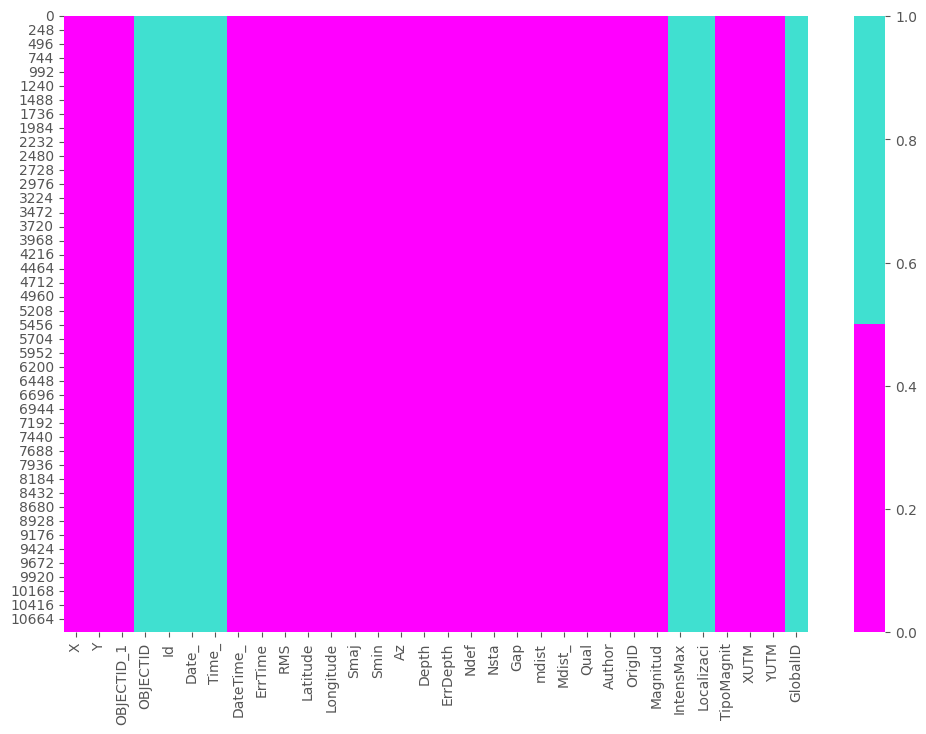

In [10]:
#Primer gráfico con las 32 categorías.
cols = df.columns[:33]                    #32 columnas.
colours = ['#FF00FF', '#40E0D0']          #Se especifica el color turquesa para datos faltantes y fucsia para no faltantes.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

El gráfico que figura  muestra los patrones de datos que faltan de las 32 características. El eje horizontal muestra el nombre del atributo de entrada; el eje vertical muestra el número de observaciones/filas; el color turquesa representa los datos que faltan, mientras que el color fucsia, en caso contrario.
Por ejemplo, vemos que la característica *OBJECTID_1*, *Id*, *Date_*, *Time_*, *IntensMax*, *Localizacion* y *GlobalID* tiene valores perdidos en todas las filas. Por otra parte, el resto de las características no tienen valores perdidos.

## Missing Data Percentage List
También podemos hacer una lista de los porcentajes de datos que faltan para cada característica. Es útil cuando se dispone muchas características en el conjunto de datos.

In [11]:
#Si se trata de un conjunto de datos más grande y la visualización lleva demasiado tiempo, conviene hacerlo.
#Porcentaje de valores perdidos.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

X - 0%
Y - 0%
OBJECTID_1 - 0%
OBJECTID - 100%
Id - 100%
Date_ - 100%
Time_ - 100%
DateTime_ - 0%
ErrTime - 0%
RMS - 0%
Latitude - 0%
Longitude - 0%
Smaj - 0%
Smin - 0%
Az - 0%
Depth - 0%
ErrDepth - 0%
Ndef - 0%
Nsta - 0%
Gap - 0%
mdist - 0%
Mdist_ - 0%
Qual - 0%
Author - 0%
OrigID - 0%
Magnitud - 0%
IntensMax - 100%
Localizaci - 100%
TipoMagnit - 0%
XUTM - 0%
YUTM - 0%
GlobalID - 100%


Esto produce una lista que muestra el porcentaje de valores faltantes para cada una de las características. En concreto, se observa que tenemos características totalmente vacías:
1. OBJECTID - 100%
2. Id - 100%
3. Date_ - 100%
4. Time_ - 100%
5. IntensMax - 100%
6. Localizaci - 100%
7. GlobalID - 100%

Cuando llegue el momento serán borradas porque estas características no contienen ni un solo dato y, por ende, no aportan ninguna información.

No existen otras variables con un alto porcentaje de valores perdidos o con un porcentaje menos significativo donde se tenga que decidir que hacer con ellas.

Esta claro que la lista de porcentajes generada es un resumen útil que puede complementar la visualización del mapa de calor.

##Dejar o no dejar la característica
Eliminamos la característica cuando estamos seguros de que esta no proporciona información útil.

Por ejemplo, de la lista de porcentajes de datos faltantes, se había comentado una serie de características totalmente vacías.

Por otra parte, hay que estar seguro de que una característica no proporciona información útil para que sea borrada. Luego, se decide eliminar únicamente aquellas características cuyo porcentaje de valores faltantes es el 100%. Estas son:
1. OBJECTID - 100%
2. Id - 100%
3. Date_ - 100%
4. Time_ - 100%
5. IntensMax - 100%
6. Localizaci - 100%
7. GlobalID - 100%

In [12]:
df = df_numeric
df.drop(["OBJECTID",'Id','Date_','Time_','IntensMax', 'Localizaci', 'GlobalID'], axis = 1, inplace = True)
df.head()

,X,Y,OBJECTID_1,ErrTime,RMS,Latitude,Longitude,Smaj,Smin,Az,Depth,ErrDepth,Ndef,Nsta,Gap,mdist,Mdist_,Magnitud,XUTM,YUTM
0,-17.8807,28.5661,70306,2.18,0.19,28.5661,-17.8807,16.6,10.4,81,21.6,12.7,9,5,189,0.02,0.20,1.6,218191,3163304
1,-17.8508,28.5584,70307,2.19,0.20,28.5584,-17.8508,46.7,13.6,67,28.2,13.0,8,4,149,0.03,0.13,2.7,221097,3162380
2,-17.8735,28.5719,70308,2.33,0.16,28.5719,-17.8735,18.9,10.1,87,24.2,14.0,8,5,181,0.01,0.19,1.7,218912,3163930
3,-17.8802,28.5656,70309,2.44,0.11,28.5656,-17.8802,18.3,12.1,87,24.4,13.7,8,5,189,0.02,0.20,1.7,218239,3163248
4,-17.8549,28.5499,70310,1.93,0.17,28.5499,-17.8549,19.7,10.8,90,26.3,11.5,10,5,168,0.03,0.20,2.6,220674,3161448


La variable OBJECTID_1 la detecta como numérica cuando realmente no lo es, es un identificador único para el evento del terremoto.

In [13]:
df.drop(["OBJECTID_1"], axis = 1, inplace = True)
df.head()

,X,Y,ErrTime,RMS,Latitude,Longitude,Smaj,Smin,Az,Depth,ErrDepth,Ndef,Nsta,Gap,mdist,Mdist_,Magnitud,XUTM,YUTM
0,-17.8807,28.5661,2.18,0.19,28.5661,-17.8807,16.6,10.4,81,21.6,12.7,9,5,189,0.02,0.20,1.6,218191,3163304
1,-17.8508,28.5584,2.19,0.20,28.5584,-17.8508,46.7,13.6,67,28.2,13.0,8,4,149,0.03,0.13,2.7,221097,3162380
2,-17.8735,28.5719,2.33,0.16,28.5719,-17.8735,18.9,10.1,87,24.2,14.0,8,5,181,0.01,0.19,1.7,218912,3163930
3,-17.8802,28.5656,2.44,0.11,28.5656,-17.8802,18.3,12.1,87,24.4,13.7,8,5,189,0.02,0.20,1.7,218239,3163248
4,-17.8549,28.5499,1.93,0.17,28.5499,-17.8549,19.7,10.8,90,26.3,11.5,10,5,168,0.03,0.20,2.6,220674,3161448


In [14]:
#Comprobación
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

X - 0%
Y - 0%
ErrTime - 0%
RMS - 0%
Latitude - 0%
Longitude - 0%
Smaj - 0%
Smin - 0%
Az - 0%
Depth - 0%
ErrDepth - 0%
Ndef - 0%
Nsta - 0%
Gap - 0%
mdist - 0%
Mdist_ - 0%
Magnitud - 0%
XUTM - 0%
YUTM - 0%


Se obtiene una lista donde el porcentaje de valores perdidos para cada variable es nulo.
Nuestro Datasets está limpio. de datos faltantes.

##Outliers


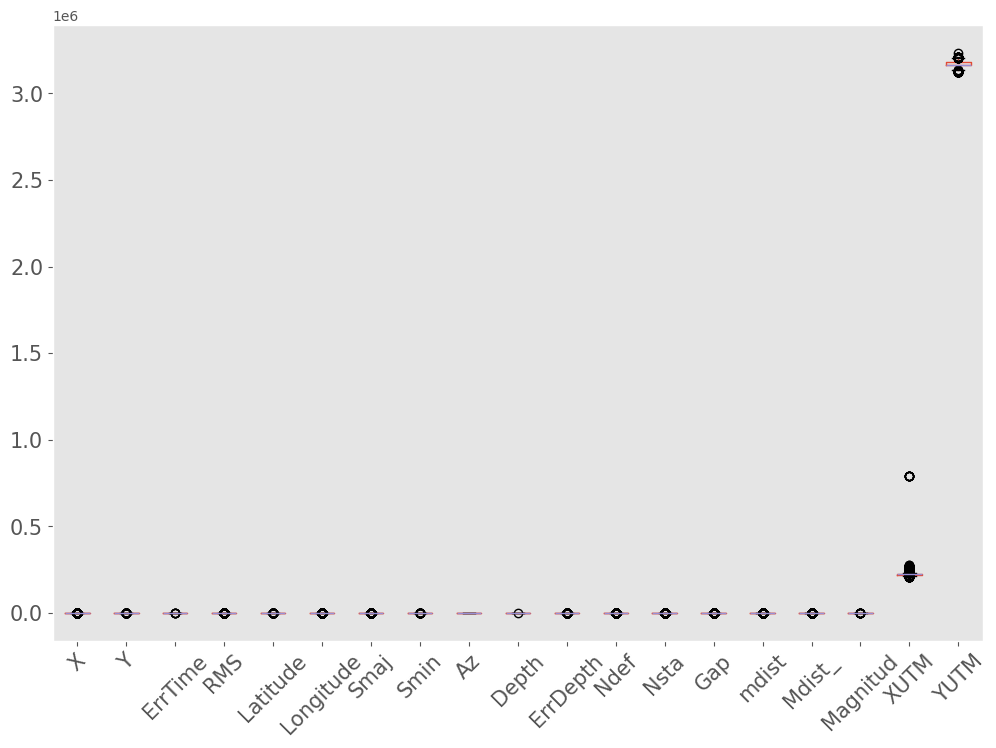

In [15]:
boxplot = df.boxplot(grid=False, rot=45, fontsize=15)
plt.savefig("Boxplot.jpg", bbox_inches='tight')


# Selección de características



Para empezar cargamos los datos en un DataFrame de la librería Pandas y mostramos nuevamente los datos:

In [16]:
#Si se trata de un conjunto de datos más grande y la visualización lleva demasiado tiempo, conviene hacer una lista de porcentajes de valores perdidos.
import pandas as pd
import io
df.head(5)

,X,Y,ErrTime,RMS,Latitude,Longitude,Smaj,Smin,Az,Depth,ErrDepth,Ndef,Nsta,Gap,mdist,Mdist_,Magnitud,XUTM,YUTM
0,-17.8807,28.5661,2.18,0.19,28.5661,-17.8807,16.6,10.4,81,21.6,12.7,9,5,189,0.02,0.20,1.6,218191,3163304
1,-17.8508,28.5584,2.19,0.20,28.5584,-17.8508,46.7,13.6,67,28.2,13.0,8,4,149,0.03,0.13,2.7,221097,3162380
2,-17.8735,28.5719,2.33,0.16,28.5719,-17.8735,18.9,10.1,87,24.2,14.0,8,5,181,0.01,0.19,1.7,218912,3163930
3,-17.8802,28.5656,2.44,0.11,28.5656,-17.8802,18.3,12.1,87,24.4,13.7,8,5,189,0.02,0.20,1.7,218239,3163248
4,-17.8549,28.5499,1.93,0.17,28.5499,-17.8549,19.7,10.8,90,26.3,11.5,10,5,168,0.03,0.20,2.6,220674,3161448


# Correlación entre variables



Se calcula, mediante el test de correlación de Pearson, los coeficientes de correlaciones que se corresponde con cada uno de los posibles pares de las variables del conjunto de datos en estudio.

In [17]:
df_feat = df
df_feat = df_feat.astype('float')
corr_df = df_feat.corr(method='pearson')

print("El DataFrame de correlaciones es:")
print(corr_df, "\n")

El DataFrame de correlaciones es:
                  X         Y   ErrTime       RMS  Latitude  Longitude  \
X          1.000000  0.192385 -0.186549  0.203039  0.192385   1.000000   
Y          0.192385  1.000000 -0.309503  0.016030  1.000000   0.192385   
ErrTime   -0.186549 -0.309503  1.000000 -0.360317 -0.309503  -0.186549   
RMS        0.203039  0.016030 -0.360317  1.000000  0.016030   0.203039   
Latitude   0.192385  1.000000 -0.309503  0.016030  1.000000   0.192385   
Longitude  1.000000  0.192385 -0.186549  0.203039  0.192385   1.000000   
Smaj      -0.066688 -0.394174  0.741689 -0.235059 -0.394174  -0.066688   
Smin      -0.151925 -0.400102  0.878305 -0.295523 -0.400102  -0.151925   
Az         0.142183  0.722289 -0.456946  0.114913  0.722289   0.142183   
Depth     -0.045779 -0.560816  0.684230 -0.143011 -0.560816  -0.045779   
ErrDepth   0.052894 -0.165968  0.788889 -0.211080 -0.165968   0.052894   
Ndef       0.122570 -0.352392 -0.452191  0.355791 -0.352392   0.122570   
Nsta

La interpretación de estos valores es sencilla, basta con saber que aquellos valores cercanos a cero representan un menor grado de asociación entre un par de variables y los cercanos a 1 y -1 una mayor correlación entre el par de variables. Sin embargo, buscar aquellas características que están más, o menos, correladas en función de estos valores podría resultar algo tedioso, tal y como se han presentado. Así que podríamos apoyarnos en algún gráfico que muestre, de forma más clara, las correlaciones anteriores. Por ejemplo, los dos siguientes:

<Axes: >

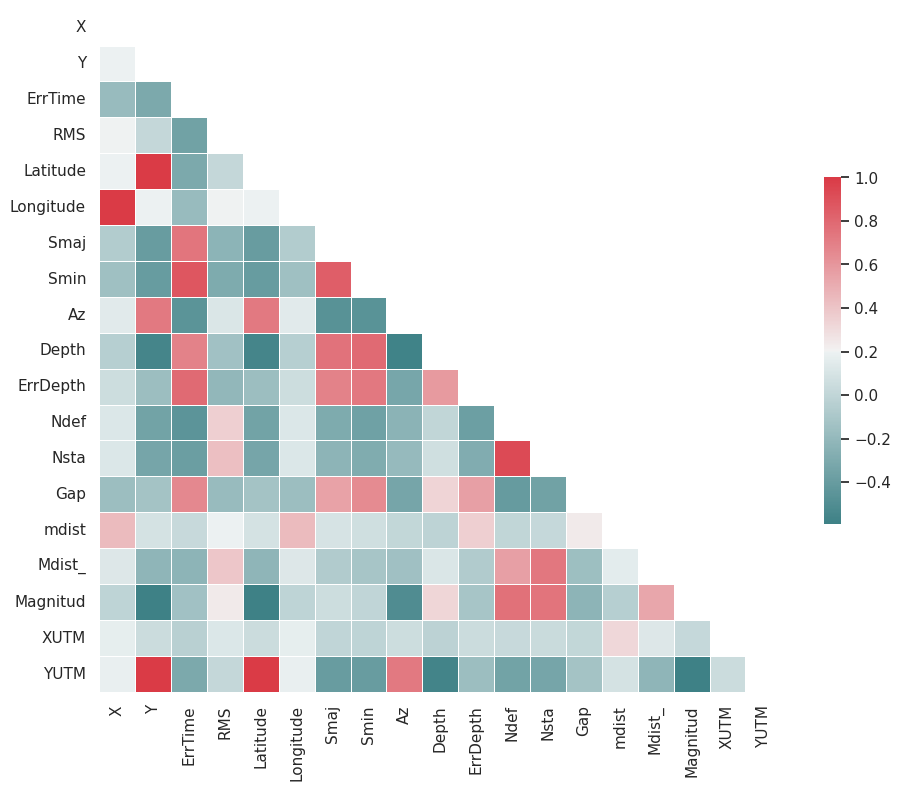

In [18]:
R = df_feat.corr()

sns.set(style="white")
mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr_df,mask=mask, cmap=cmap,square = True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [19]:
corr_df.style.background_gradient(cmap='coolwarm')


,X,Y,ErrTime,RMS,Latitude,Longitude,Smaj,Smin,Az,Depth,ErrDepth,Ndef,Nsta,Gap,mdist,Mdist_,Magnitud,XUTM,YUTM
X,1.000000,0.192385,-0.186549,0.203039,0.192385,1.000000,-0.066688,-0.151925,0.142183,-0.045779,0.052894,0.122570,0.122416,-0.163201,0.440521,0.125007,-0.012042,0.170250,0.181137
Y,0.192385,1.000000,-0.309503,0.016030,1.000000,0.192385,-0.394174,-0.400102,0.722289,-0.560816,-0.165968,-0.352392,-0.331767,-0.128224,0.090566,-0.222248,-0.591184,0.044817,0.999934
ErrTime,-0.186549,-0.309503,1.000000,-0.360317,-0.309503,-0.186549,0.741689,0.878305,-0.456946,0.684230,0.788889,-0.452191,-0.382154,0.663883,0.027108,-0.228246,-0.140364,-0.035713,-0.307910
RMS,0.203039,0.016030,-0.360317,1.000000,0.016030,0.203039,-0.235059,-0.295523,0.114913,-0.143011,-0.211080,0.355791,0.425558,-0.183742,0.194918,0.391281,0.239308,0.117163,0.013664
Latitude,0.192385,1.000000,-0.309503,0.016030,1.000000,0.192385,-0.394174,-0.400102,0.722289,-0.560816,-0.165968,-0.352392,-0.331767,-0.128224,0.090566,-0.222248,-0.591184,0.044817,0.999934
Longitude,1.000000,0.192385,-0.186549,0.203039,0.192385,1.000000,-0.066688,-0.151925,0.142183,-0.045779,0.052894,0.122570,0.122416,-0.163201,0.440521,0.125007,-0.012042,0.170250,0.181137
Smaj,-0.066688,-0.394174,0.741689,-0.235059,-0.394174,-0.066688,1.000000,0.842359,-0.469194,0.751229,0.684239,-0.298645,-0.228186,0.546821,0.093443,-0.076013,0.051412,-0.005031,-0.394219
Smin,-0.151925,-0.400102,0.878305,-0.295523,-0.400102,-0.151925,0.842359,1.000000,-0.467785,0.792133,0.730889,-0.365854,-0.289139,0.646328,0.064453,-0.118808,-0.003298,-0.011407,-0.399160
Az,0.142183,0.722289,-0.456946,0.114913,0.722289,0.142183,-0.469194,-0.467785,1.000000,-0.573881,-0.327287,-0.243561,-0.191677,-0.332541,0.009424,-0.144502,-0.505381,0.053376,0.722062
Depth,-0.045779,-0.560816,0.684230,-0.143011,-0.560816,-0.045779,0.751229,0.792133,-0.573881,1.000000,0.587221,-0.001266,0.062756,0.334374,-0.017620,0.112539,0.322460,-0.024028,-0.561451


La gama de colores empleados y su interpretación coincide con la del gráfico anterior. Se destaca que contamos con los valores de la matriz de correlaciones. Así se observa que los siguientes pares de variables están altamente correlados:

1. Latitude - Y

2. YUTM - Y

3. Longitude - X

4. Nsta - Ndef

5. Smin - ErrTime

6. Smin - Smaj

En concreto, presentan un coeficiente de correlación superior a 0.8. Por ende, podríamos eliminar una variable por cada par.

In [20]:
#df_feat = df_feat.drop(['X','Y', 'Smaj', 'Smin', 'Ndef', 'XUTM','YUTM'],axis=1)
df_feat = df_feat.drop(['X','Y', 'ErrTime','Smin', 'Ndef', 'XUTM','YUTM'],axis=1)
df_feat.head()

,RMS,Latitude,Longitude,Smaj,Az,Depth,ErrDepth,Nsta,Gap,mdist,Mdist_,Magnitud
0,0.19,28.5661,-17.8807,16.6,81.0,21.6,12.7,5.0,189.0,0.02,0.20,1.6
1,0.20,28.5584,-17.8508,46.7,67.0,28.2,13.0,4.0,149.0,0.03,0.13,2.7
2,0.16,28.5719,-17.8735,18.9,87.0,24.2,14.0,5.0,181.0,0.01,0.19,1.7
3,0.11,28.5656,-17.8802,18.3,87.0,24.4,13.7,5.0,189.0,0.02,0.20,1.7
4,0.17,28.5499,-17.8549,19.7,90.0,26.3,11.5,5.0,168.0,0.03,0.20,2.6


In [21]:
corr_df = df_feat.corr(method='pearson')

print("El DataFrame de correlaciones es:")
print(corr_df, "\n")

El DataFrame de correlaciones es:
                RMS  Latitude  Longitude      Smaj        Az     Depth  \
RMS        1.000000  0.016030   0.203039 -0.235059  0.114913 -0.143011   
Latitude   0.016030  1.000000   0.192385 -0.394174  0.722289 -0.560816   
Longitude  0.203039  0.192385   1.000000 -0.066688  0.142183 -0.045779   
Smaj      -0.235059 -0.394174  -0.066688  1.000000 -0.469194  0.751229   
Az         0.114913  0.722289   0.142183 -0.469194  1.000000 -0.573881   
Depth     -0.143011 -0.560816  -0.045779  0.751229 -0.573881  1.000000   
ErrDepth  -0.211080 -0.165968   0.052894  0.684239 -0.327287  0.587221   
Nsta       0.425558 -0.331767   0.122416 -0.228186 -0.191677  0.062756   
Gap       -0.183742 -0.128224  -0.163201  0.546821 -0.332541  0.334374   
mdist      0.194918  0.090566   0.440521  0.093443  0.009424 -0.017620   
Mdist_     0.391281 -0.222248   0.125007 -0.076013 -0.144502  0.112539   
Magnitud   0.239308 -0.591184  -0.012042  0.051412 -0.505381  0.322460   

   

<Axes: >

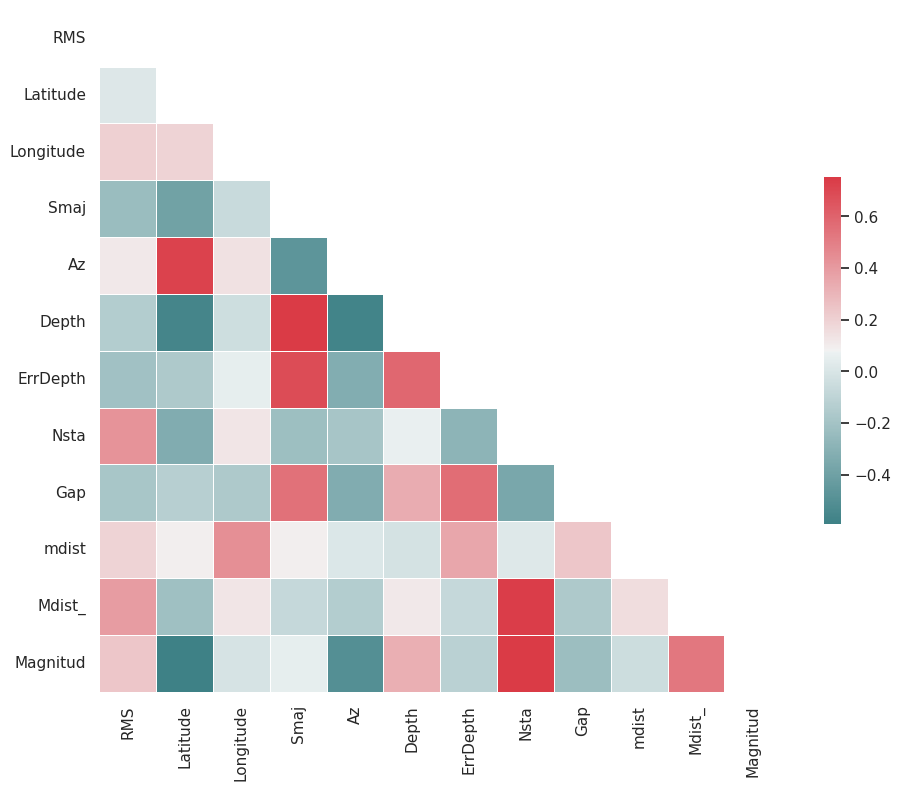

In [22]:
R = df_feat.corr()

sns.set(style="white")
mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr_df,mask=mask, cmap=cmap,square = True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [23]:
corr_df.style.background_gradient(cmap='coolwarm')

,RMS,Latitude,Longitude,Smaj,Az,Depth,ErrDepth,Nsta,Gap,mdist,Mdist_,Magnitud
RMS,1.000000,0.016030,0.203039,-0.235059,0.114913,-0.143011,-0.211080,0.425558,-0.183742,0.194918,0.391281,0.239308
Latitude,0.016030,1.000000,0.192385,-0.394174,0.722289,-0.560816,-0.165968,-0.331767,-0.128224,0.090566,-0.222248,-0.591184
Longitude,0.203039,0.192385,1.000000,-0.066688,0.142183,-0.045779,0.052894,0.122416,-0.163201,0.440521,0.125007,-0.012042
Smaj,-0.235059,-0.394174,-0.066688,1.000000,-0.469194,0.751229,0.684239,-0.228186,0.546821,0.093443,-0.076013,0.051412
Az,0.114913,0.722289,0.142183,-0.469194,1.000000,-0.573881,-0.327287,-0.191677,-0.332541,0.009424,-0.144502,-0.505381
Depth,-0.143011,-0.560816,-0.045779,0.751229,-0.573881,1.000000,0.587221,0.062756,0.334374,-0.017620,0.112539,0.322460
ErrDepth,-0.211080,-0.165968,0.052894,0.684239,-0.327287,0.587221,1.000000,-0.281945,0.563971,0.353987,-0.074605,-0.116855
Nsta,0.425558,-0.331767,0.122416,-0.228186,-0.191677,0.062756,-0.281945,1.000000,-0.362187,0.019825,0.738174,0.750579
Gap,-0.183742,-0.128224,-0.163201,0.546821,-0.332541,0.334374,0.563971,-0.362187,1.000000,0.237476,-0.162024,-0.230794
mdist,0.194918,0.090566,0.440521,0.093443,0.009424,-0.017620,0.353987,0.019825,0.237476,1.000000,0.158590,-0.049410


## Análisis de componentes principales

Con el fin de observar como están relacionadas las variables también podemos hacer una representación en PCA de las mismas


Componentes lineales:
 [[ 0.00910219  0.0087964   0.00927405 ...  0.00996979  0.00988841
   0.01034339]
 [ 0.00759968  0.00784579  0.00626857 ... -0.00111715  0.0013522
  -0.00235073]]

Ratio de variabilidad:  [0.91945426 0.0718983 ] 



<ipython-input-24-7f03dee75e83>:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


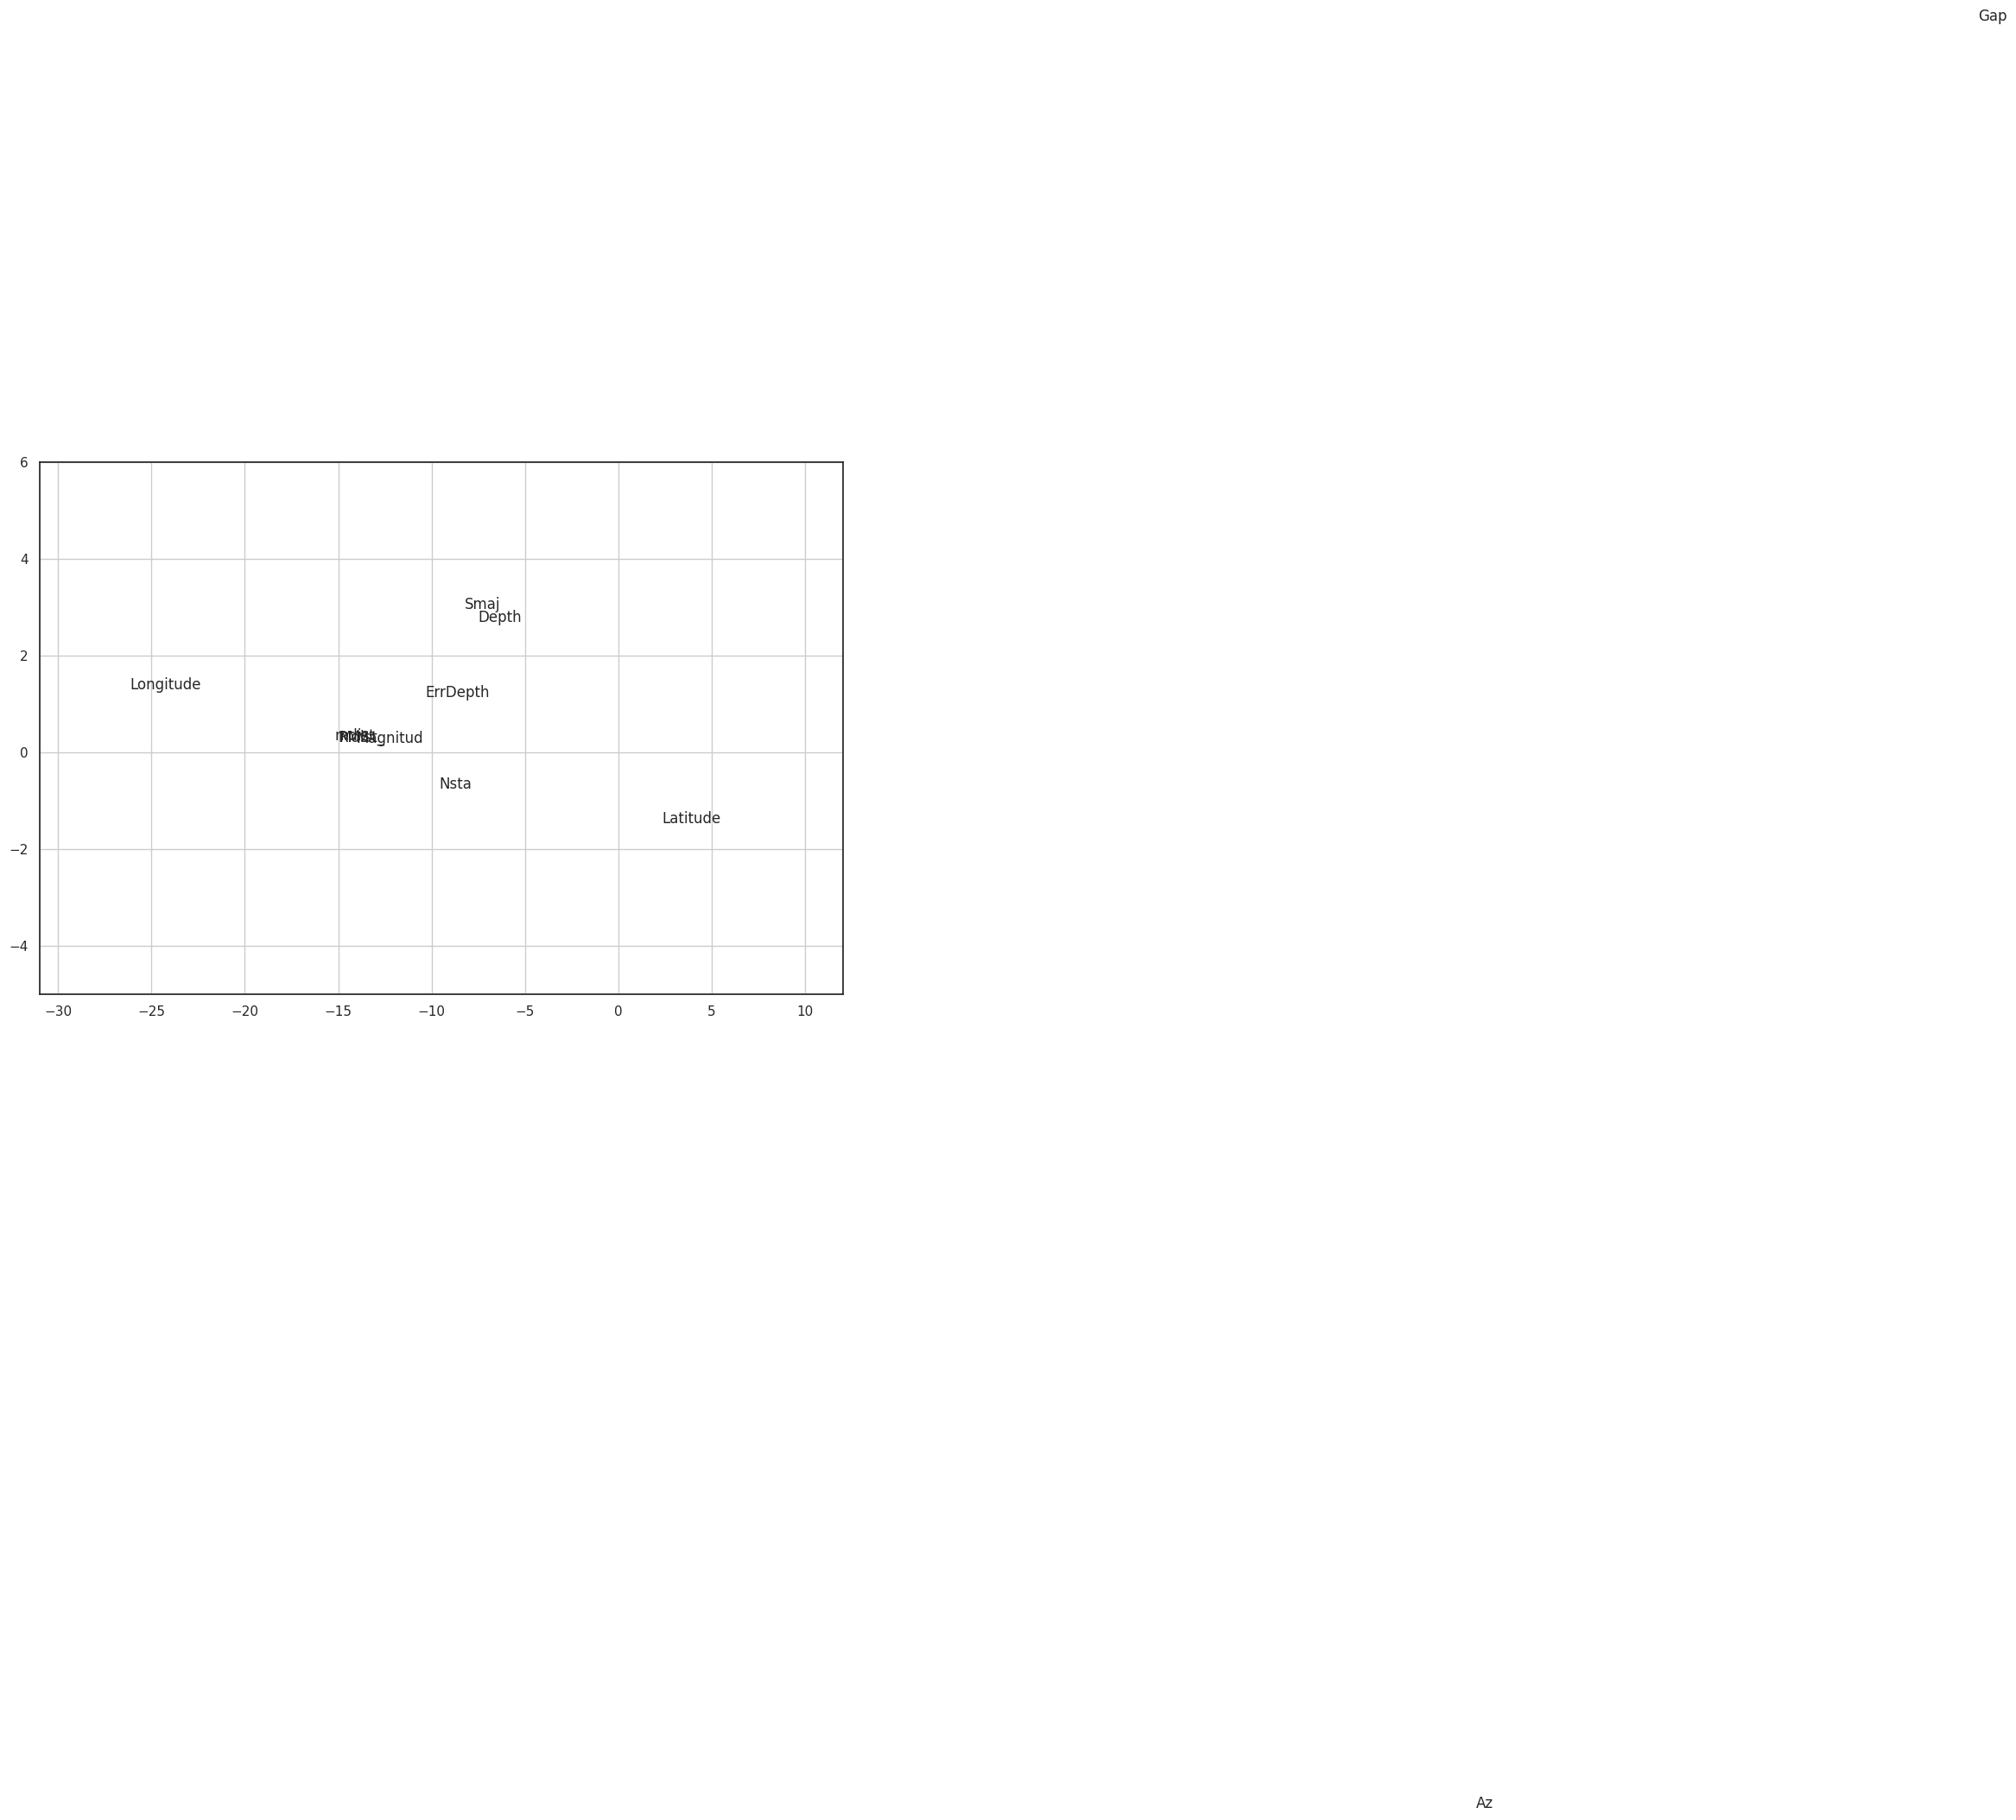

In [24]:
#1. Normalization of the data
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing
df_feat_t = transpose(df_feat)
names =  df_feat_t.index
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat_t)

#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Componentes lineales:\n", estimator.components_)
print("\nRatio de variabilidad: ", estimator.explained_variance_ratio_, "\n")

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i])

ax.grid(True)
plt.xlim(-31, 12)
plt.ylim(-5, 6)
fig.tight_layout()
plt.show()

El análisis de componentes principales es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables no correlacionadas. Este es uno de los motivos por los que se ha eliminado previamentente las variables altamente correlacionadas.


Vamos ahora a determinar mediante diferentes métodos de machine learning no supervisado las diferentes agrupaciones de nuestro conjunto de variables seleccionados.

## Clustering jerárquico


Comenzando con el clustering jerárquico, vemos un heatmap de las correlaciones entre las distancias euclídeas de las variables para poder indentificar como están de cerca las unas de las otras.


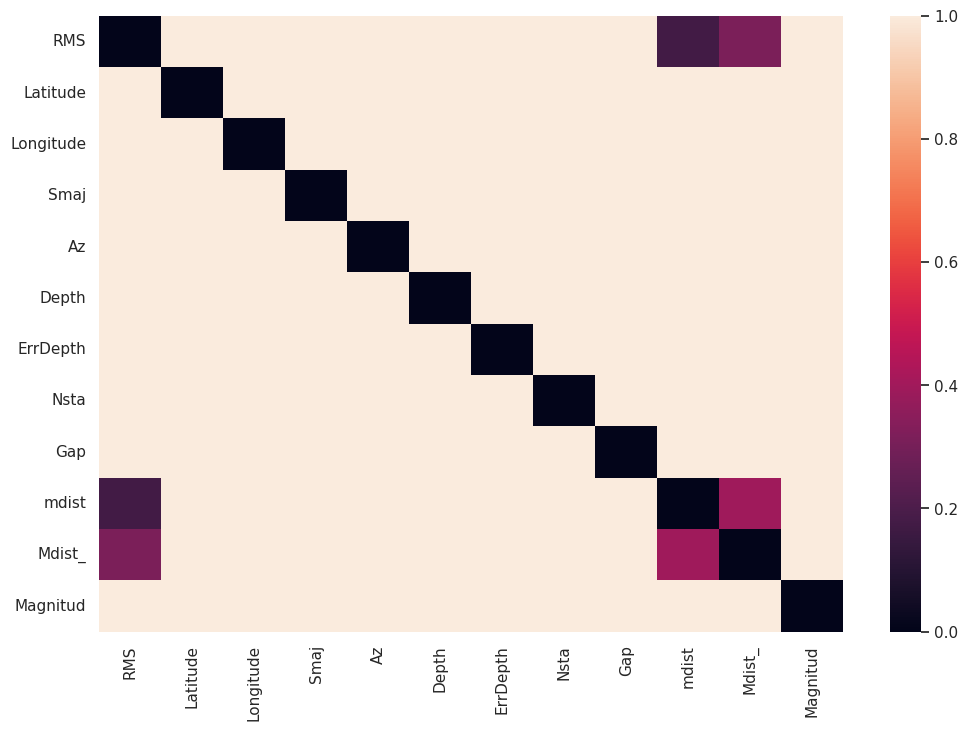

In [25]:
# 2. Compute the similarity matrix
#http://docs.scipy.org/doc/scipy/reference/cluster.html
from scipy import cluster
import sklearn.metrics
dist = sklearn.metrics.DistanceMetric.get_metric('euclidean')
features_norm = features_norm.astype('float')
matdist= dist.pairwise(features_norm)

# 3.1.1 Visualization
import seaborn as sns; sns.set()
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

Vamos a aplicar el clustering jerárquico para ver como este método separa nuestras variables. Para ello cargamos el método simple.

<ipython-input-26-92467335bf32>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(matdist, method = 'single')


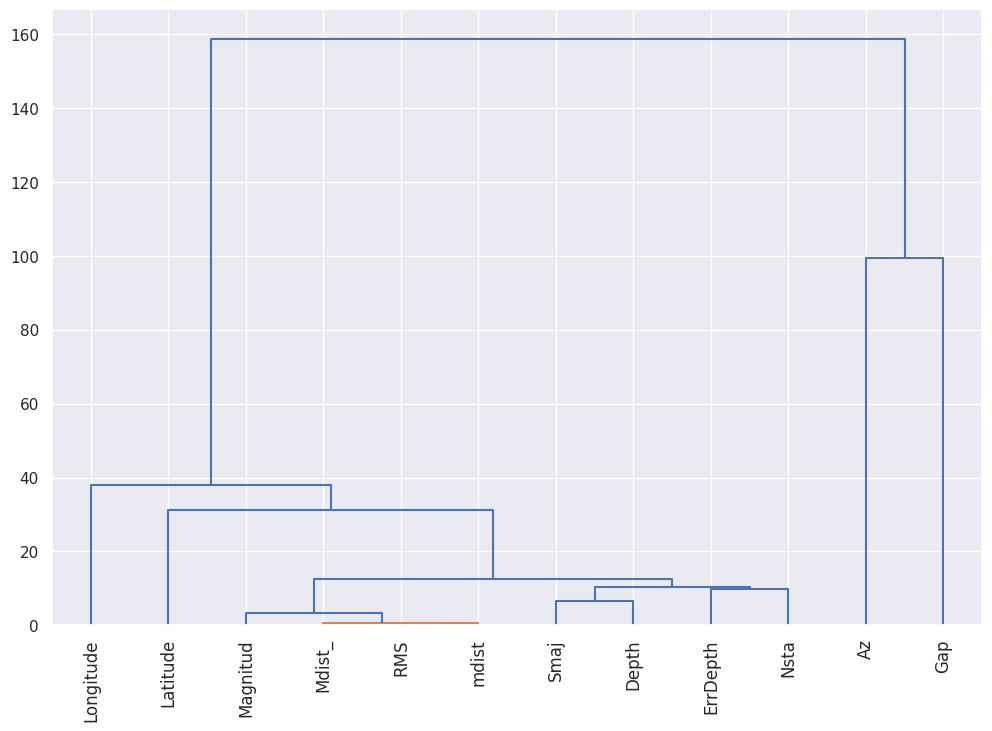

In [26]:
# 3. Building the Dendrogram
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
clusters = cluster.hierarchy.linkage(matdist, method = 'single')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
cluster.hierarchy.dendrogram(clusters, color_threshold = 3, labels = names , leaf_rotation=90)
plt.show()

In [27]:
cut = 10 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([1, 4, 5, 2, 6, 2, 3, 3, 7, 1, 1, 1], dtype=int32)

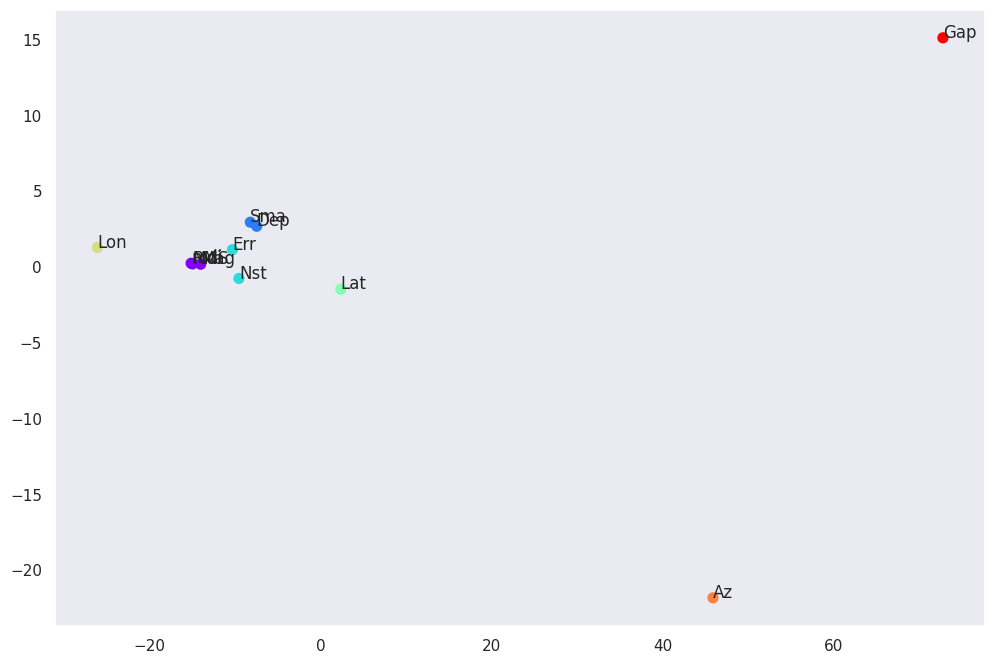

In [28]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50, cmap="rainbow")
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3])

plt.grid()
plt.show()


## DBSCAN


De igual manera aplicamos el algoritmo de DBSCAN, el resultado que se espera obtener de este es similar al anterior, puesto que la naturaleza de los datos es clara.


## Parametrización


Primero que nada necesitamos ver cuales son los parámetros optimos para nuestro método, para ello vemos las curvas que nos indican el rango óptimo del radio de nuestro método.

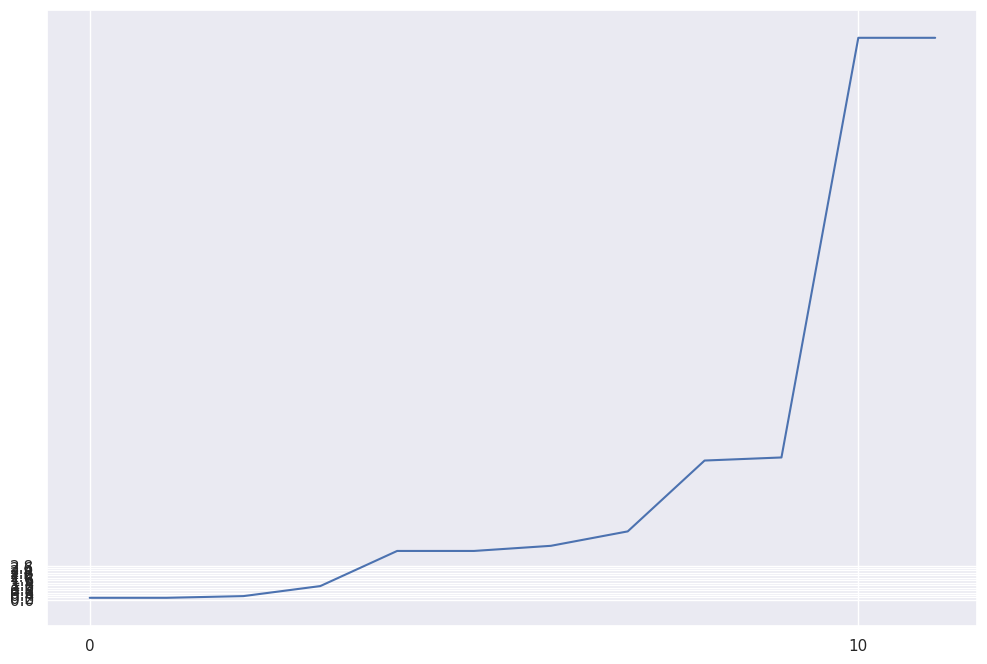

In [29]:
minPts=1
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(features_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(features_norm):
    for j in range(len(features_norm)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])

seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 120, 10))
ax.set_yticks(np.arange(0, 3, 0.2))

plt.plot(seq)


plt.show()

## Ejecución

In [30]:
from sklearn.cluster import DBSCAN

for eps in np.arange(0.8, 2.8, 0.20):
  db = DBSCAN(eps, min_samples=minPts).fit(features_norm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))

#labels

  0.80, 10, 0
  1.00, 10, 0
  1.20, 9, 0
  1.40, 9, 0
  1.60, 9, 0
  1.80, 9, 0
  2.00, 9, 0
  2.20, 9, 0
  2.40, 9, 0
  2.60, 9, 0


Puesto que sabemos que deseamos obtener 6 cluster, vamos a escoger la opción de eps=2. El resultado que obtenemos de DBSCAN con 7 clusters, es también valido. Puesto que en las gráficas de correlación de distancias vimos que las distancias que hacían referencia a las 4 variables station_ no estaban tan espacialmente juntas como podríamos esperar, por eso un resultado con 7 clusters es completamente lógico para distancias pequeñas en DSCAN.

In [31]:
db = DBSCAN(eps=2, min_samples=1).fit(features_norm)
labels = db.labels_
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 0, 0])

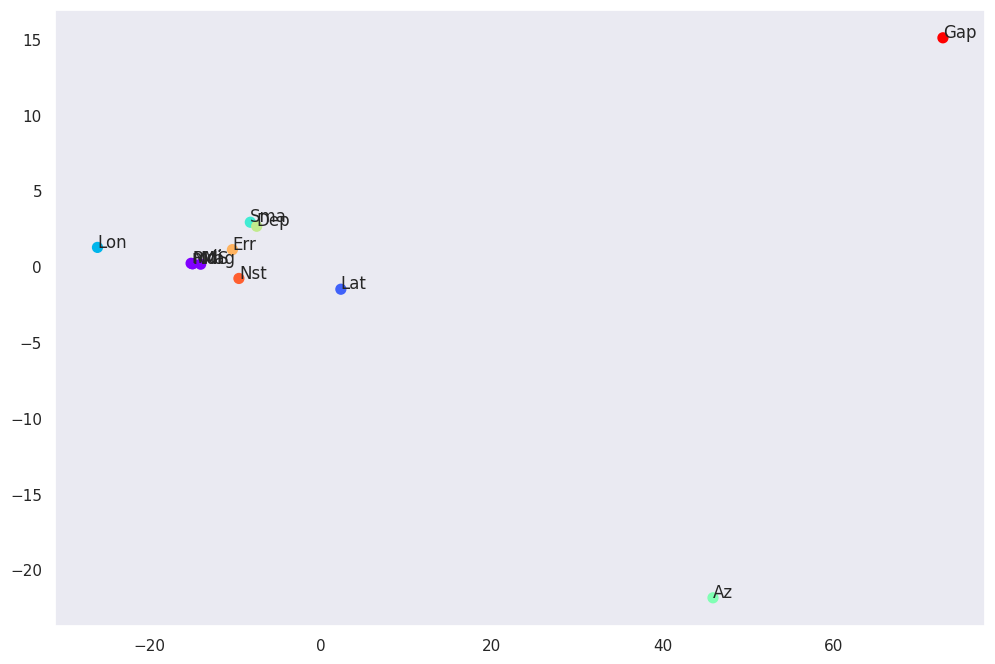

In [32]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50, cmap="rainbow")
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3])
plt.grid()
plt.show()

Como resultado obtenemos la misma agrupación que con clustering jerárquico.


## Análisis de componentes principales

Viendo las agrupaciones de variables que se dan con los distintos métodos de machine learning no supervisados, vamos a optar por realizar un PCA (*principal component analysis*) sobre las dos agrupaciones de variables que se ven claramente en las gráficas.


In [33]:
from sklearn.cluster import KMeans
pca = PCA(n_components=1)

df_retemp = df_feat.loc[:,['RMS', 'Mdist_','mdist']]
pca.fit(df_retemp)

retemp_reduced = pca.transform(df_retemp)
retemp_traindf = pd.DataFrame(df_retemp)
retemp_reduceddf = pd.DataFrame(retemp_reduced, index=df_retemp.index, columns=['pca_retemp'])
#X_reduceddf['cluster'] = clusters
retemp_reduceddf.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10893 entries, 0 to 10892
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pca_retemp  10893 non-null  float64
dtypes: float64(1)
memory usage: 85.2 KB


Estas componentes principales las añadimos a las otras 4 variables para tener un conjunto de 6 variables con el que vamos a trabajar para nuestros métodos de machine learning no supervisado.

In [34]:
#train = pd.concat([df_feat.loc[:,['Latitude','Longitude','Smaj','Smin','Az','Depth','ErrDepth','Ndef','Nsta','Gap','Magnitud']], retemp_reduceddf], axis=1)
train = pd.concat([df_feat.loc[:,['Latitude','Longitude','Smaj','Az','Depth','ErrDepth','Nsta','Gap','Magnitud']], retemp_reduceddf], axis=1)
train.head()

,Latitude,Longitude,Smaj,Az,Depth,ErrDepth,Nsta,Gap,Magnitud,pca_retemp
0,28.5661,-17.8807,16.6,81.0,21.6,12.7,5.0,189.0,1.6,-0.125555
1,28.5584,-17.8508,46.7,67.0,28.2,13.0,4.0,149.0,2.7,-0.193603
2,28.5719,-17.8735,18.9,87.0,24.2,14.0,5.0,181.0,1.7,-0.139373
3,28.5656,-17.8802,18.3,87.0,24.4,13.7,5.0,189.0,1.7,-0.135564
4,28.5499,-17.8549,19.7,90.0,26.3,11.5,5.0,168.0,2.6,-0.127914


Normalizamos los datos haciendo uso de MinMaxScaler para mejorar el computo de los métodos y minimizar errores.

In [35]:
from sklearn.preprocessing import MinMaxScaler
# performin min-max scaling each continuous feature column to the range [0, 1]
selected_features = 	['Latitude','Longitude','Smaj','Az','Depth','ErrDepth','Nsta','Gap','Magnitud', 'pca_retemp']
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[selected_features])
X_train

array([[0.36767266, 0.23360021, 0.16666667, ..., 0.46822742, 0.2826087 ,
        0.04040899],
       [0.36022441, 0.27221074, 0.52757794, ..., 0.33444816, 0.52173913,
        0.02360902],
       [0.37328303, 0.24289773, 0.1942446 , ..., 0.44147157, 0.30434783,
        0.03699765],
       ...,
       [0.40288257, 0.29455062, 0.01798561, ..., 0.18729097, 0.45652174,
        0.05307857],
       [0.36931708, 0.30539773, 0.05275779, ..., 0.31438127, 0.52173913,
        0.05606628],
       [0.36757593, 0.26691632, 0.09352518, ..., 0.26421405, 0.58695652,
        0.05114602]])

Con esto ya tenemos separado y preparado el conjunto de variables con el que vamos a trabajar para los métodos de machine learning no supervisado. Lo que esperamos obtener de estos métodos son diferentes agrupaciones de condiciones climatológicas, puesta que esa es la naturaleza de nuestro conjunto de datos. Sin embargo estamos trabajando con 6 dimensiones a las que hemos realizado un PCA para reducir el numero de variables, por lo que hemos perdido un poco de semántica. A su vez, sabemos que estos métodos no nos van a servir para poder predecir el número de enfermedades puesto que en este ejericicio no podemos saber los datos de infectados por el Dengue.

#Lo mismo para el test

In [36]:
test

,X,Y,OBJECTID_1,OBJECTID,Id,Date_,Time_,DateTime_,ErrTime,RMS,...,Qual,Author,OrigID,Magnitud,IntensMax,Localizaci,TipoMagnit,XUTM,YUTM,GlobalID
10893,-17.7448,28.5534,81199,NaN,NaN,NaN,NaN,2021/10/26 23:11:43.700+00,0.44,0.33,...,a i uk,IGN,es2021vaiwq,3.4,NaN,NaN,mbLg,231459,3161584,NaN
10894,-17.8944,28.5562,81200,NaN,NaN,NaN,NaN,2021/10/26 23:14:54.340+00,0.57,0.29,...,a i uk,IGN,es2021vaize,2.9,NaN,NaN,mbLg,216824,3162239,NaN
10895,-17.8361,28.5628,81201,NaN,NaN,NaN,NaN,2021/10/26 23:32:52.760+00,0.79,0.23,...,m i ke,IGN,es2021vajot,2.9,NaN,NaN,mbLg,222548,3162834,NaN
10896,-17.8371,28.5834,81202,NaN,NaN,NaN,NaN,2021/10/26 23:37:27.350+00,0.85,0.41,...,m i ke,IGN,es2021vajss,2.8,NaN,NaN,mbLg,222504,3165120,NaN
10897,-17.8184,28.4223,81203,NaN,NaN,NaN,NaN,2021/10/26 23:53:01.660+00,0.43,1.40,...,a i uk,IGN,es2021vakgb,4.6,NaN,NaN,mbLg,223914,3147218,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15557,-17.8804,28.6190,85865,NaN,NaN,NaN,NaN,2022/02/10 02:48:10.490+00,0.68,0.43,...,m i ke,IGN,es2022cvicb,0.9,NaN,NaN,mbLg,218362,3169168,NaN
15558,-17.8451,28.5525,85866,NaN,NaN,NaN,NaN,2022/02/10 04:26:19.090+00,1.29,0.22,...,m i ke,IGN,es2022cvlig,1.4,NaN,NaN,mbLg,221640,3161713,NaN
15559,-17.9003,28.6054,85867,NaN,NaN,NaN,NaN,2022/02/10 04:29:03.150+00,0.80,0.37,...,m i ke,IGN,es2022cvlkp,0.9,NaN,NaN,mbLg,216379,3167707,NaN
15560,-17.8845,28.6263,85868,NaN,NaN,NaN,NaN,2022/02/10 05:12:46.630+00,0.87,0.45,...,m i ke,IGN,es2022cvmwc,0.8,NaN,NaN,mbLg,217980,3169987,NaN


Eliminamos variables vacías

In [37]:
test.drop(["OBJECTID",'Id','Date_','Time_','IntensMax', 'Localizaci', 'GlobalID'], axis = 1, inplace = True)
test.head()

,X,Y,OBJECTID_1,DateTime_,ErrTime,RMS,Latitude,Longitude,Smaj,Smin,...,Gap,mdist,Mdist_,Qual,Author,OrigID,Magnitud,TipoMagnit,XUTM,YUTM
10893,-17.7448,28.5534,81199,2021/10/26 23:11:43.700+00,0.44,0.33,28.5534,-17.7448,8.3,5.5,...,105,0.05,1.04,a i uk,IGN,es2021vaiwq,3.4,mbLg,231459,3161584
10894,-17.8944,28.5562,81200,2021/10/26 23:14:54.340+00,0.57,0.29,28.5562,-17.8944,10.0,5.0,...,143,0.03,1.21,a i uk,IGN,es2021vaize,2.9,mbLg,216824,3162239
10895,-17.8361,28.5628,81201,2021/10/26 23:32:52.760+00,0.79,0.23,28.5628,-17.8361,6.5,3.9,...,71,0.03,0.26,m i ke,IGN,es2021vajot,2.9,mbLg,222548,3162834
10896,-17.8371,28.5834,81202,2021/10/26 23:37:27.350+00,0.85,0.41,28.5834,-17.8371,5.9,3.5,...,91,0.03,0.24,m i ke,IGN,es2021vajss,2.8,mbLg,222504,3165120
10897,-17.8184,28.4223,81203,2021/10/26 23:53:01.660+00,0.43,1.40,28.4223,-17.8184,4.9,3.2,...,134,0.06,3.91,a i uk,IGN,es2021vakgb,4.6,mbLg,223914,3147218


Eliminamos las mismas variables que nos salen muy correladas para el train

In [38]:
test = test.drop(['X','Y','ErrTime','OBJECTID_1', 'XUTM','YUTM'],axis=1)
test.head()

,DateTime_,RMS,Latitude,Longitude,Smaj,Smin,Az,Depth,ErrDepth,Ndef,Nsta,Gap,mdist,Mdist_,Qual,Author,OrigID,Magnitud,TipoMagnit
10893,2021/10/26 23:11:43.700+00,0.33,28.5534,-17.7448,8.3,5.5,74,13.0,7.1,23,19,105,0.05,1.04,a i uk,IGN,es2021vaiwq,3.4,mbLg
10894,2021/10/26 23:14:54.340+00,0.29,28.5562,-17.8944,10.0,5.0,77,10.1,4.7,15,14,143,0.03,1.21,a i uk,IGN,es2021vaize,2.9,mbLg
10895,2021/10/26 23:32:52.760+00,0.23,28.5628,-17.8361,6.5,3.9,81,10.8,4.1,28,15,71,0.03,0.26,m i ke,IGN,es2021vajot,2.9,mbLg
10896,2021/10/26 23:37:27.350+00,0.41,28.5834,-17.8371,5.9,3.5,79,10.1,5.0,24,13,91,0.03,0.24,m i ke,IGN,es2021vajss,2.8,mbLg
10897,2021/10/26 23:53:01.660+00,1.40,28.4223,-17.8184,4.9,3.2,122,23.4,8.6,66,55,134,0.06,3.91,a i uk,IGN,es2021vakgb,4.6,mbLg


In [39]:
test.drop(['DateTime_', 'Qual', 'Author', 'OrigID', 'TipoMagnit'], axis = 1, inplace = True)
test.head()


,RMS,Latitude,Longitude,Smaj,Smin,Az,Depth,ErrDepth,Ndef,Nsta,Gap,mdist,Mdist_,Magnitud
10893,0.33,28.5534,-17.7448,8.3,5.5,74,13.0,7.1,23,19,105,0.05,1.04,3.4
10894,0.29,28.5562,-17.8944,10.0,5.0,77,10.1,4.7,15,14,143,0.03,1.21,2.9
10895,0.23,28.5628,-17.8361,6.5,3.9,81,10.8,4.1,28,15,71,0.03,0.26,2.9
10896,0.41,28.5834,-17.8371,5.9,3.5,79,10.1,5.0,24,13,91,0.03,0.24,2.8
10897,1.40,28.4223,-17.8184,4.9,3.2,122,23.4,8.6,66,55,134,0.06,3.91,4.6


Análisis de componentes principales para el test

Componentes lineales:
 [[ 0.0145629   0.01384625  0.01512312 ...  0.01319769  0.01356314
   0.01355307]
 [ 0.00295771  0.0138161  -0.01742929 ...  0.02238496  0.01748059
   0.01605118]]

Ratio de variabilidad:  [0.95102197 0.03942091] 



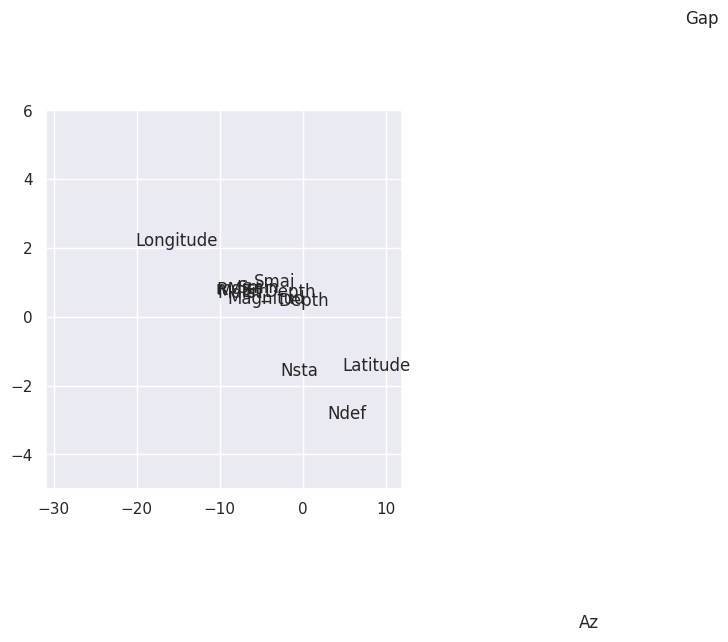

In [40]:
#1. Normalization of the data
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing
df_feat_t = transpose(test)
names =  df_feat_t.index
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat_t)

#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Componentes lineales:\n", estimator.components_)
print("\nRatio de variabilidad: ", estimator.explained_variance_ratio_, "\n")

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i])

ax.grid(True)
plt.xlim(-31, 12)
plt.ylim(-5, 6)
fig.tight_layout()
plt.show()

In [41]:
from sklearn.cluster import KMeans
pca = PCA(n_components=1)

df_retemp = test.loc[:,['RMS', 'Mdist_','mdist']]
pca.fit(df_retemp)

retemp_reduced = pca.transform(df_retemp)
retemp_traindf = pd.DataFrame(df_retemp)
retemp_reduceddf = pd.DataFrame(retemp_reduced, index=df_retemp.index, columns=['pca_retemp'])
#X_reduceddf['cluster'] = clusters
retemp_reduceddf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4669 entries, 10893 to 15561
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pca_retemp  4669 non-null   float64
dtypes: float64(1)
memory usage: 73.0 KB


In [42]:
test = pd.concat([test.loc[:,['Latitude','Longitude','Smaj','Az','Depth','ErrDepth','Nsta','Gap','Magnitud']], retemp_reduceddf], axis=1)
test.head()

,Latitude,Longitude,Smaj,Az,Depth,ErrDepth,Nsta,Gap,Magnitud,pca_retemp
10893,28.5534,-17.7448,8.3,74,13.0,7.1,19,105,3.4,0.524415
10894,28.5562,-17.8944,10.0,77,10.1,4.7,14,143,2.9,0.688927
10895,28.5628,-17.8361,6.5,81,10.8,4.1,15,71,2.9,-0.261934
10896,28.5834,-17.8371,5.9,79,10.1,5.0,13,91,2.8,-0.262175
10897,28.4223,-17.8184,4.9,122,23.4,8.6,55,134,4.6,3.494041


#Optimización de hiperparámetros

#1. Parametrización

Todo modelos de aprendizaje automático necesitan de cierta parametrización con el fin de que su comportamiento se ajuste mejor a cada problema concreto.
Según la naturaleza del modelo este puede tener muchos parámetros y encontrar la mejor combinación de los mismos puede ser tratado como un problema de búsqueda/optimización.

Este problema es denominado habitualmente **optimización de hiperparámetros**, donde los parámetros del algoritmo se denominan hiperparámetros, mientras que los coeficientes encontrados por el propio algoritmo de aprendizaje se denominan *parámetros*.

El planteamiento será del de buscar aquella parametrización que ofrezca los resultados de mayor calidad (con respecto a las métricas establecidas) y de mayor robustez.

Scikit-learn proporciona diferentes herramientas para que la optimización de estos hiperparámetros pueda ser lo más sencilla posible. En concreto ofrece dos alternativas, la *búsqueda en cuadrícula* (**grid search**) y la *búsqueda aleatoria* (**RandomSearch**)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

Para utilizar estas herramientas de búsqueda, primero necesitamos crear el conjunto de parámetros a muestrear durante el proceso de optimización.

Y crear (construir) el elemento que va a ser nuestro regresor


In [44]:
regressor = RandomForestRegressor()
regressor

RandomForestRegressor()

## GridSearch

La búsqueda en cuadrícula es un enfoque de ajuste de parámetros que permite construir y evaluar metódicamente un modelo para cada combinación de parámetros de algoritmo especificados en una cuadrícula.

In [45]:

def report(results, n_top=3): # Función para mostrar resultados
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [46]:
param_dist = {"n_estimators": [32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [8,4, 2], # Maximum number of levels in tree
              "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
              "min_samples_leaf": [8, 12, 16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [47]:
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv=5)

# Fit the random search model
grid_regres.fit(X = train.drop(['Magnitud'], axis=1), y = train['Magnitud'])


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [8, 4, 2],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [32, 64, 128]})

In [48]:
report(grid_regres.cv_results_, n_top = 10)

Model with rank: 1
Mean validation score: 0.106 (std: 1.268)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 32}

Model with rank: 2
Mean validation score: 0.096 (std: 1.292)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 128}

Model with rank: 3
Mean validation score: 0.093 (std: 1.289)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 128}

Model with rank: 4
Mean validation score: 0.090 (std: 1.285)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 32}

Model with rank: 5
Mean validation score: 0.089 (std: 1.306)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estima

In [49]:
grid_regres.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      min_samples_leaf=8, min_samples_split=4, n_estimators=32)

In [50]:
# choose the best
best_grid = grid_regres.best_estimator_

# fit and predict
best_grid.fit( X = train.drop(['Magnitud'], axis=1), y = train['Magnitud'])
y_pred = best_grid.predict(X = test.drop(['Magnitud'], axis = 1))

# EVALUATE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Magnitud'], y_pred)
print ('MAE', mae)

# EVALUATE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Magnitud'], y_pred)
print ('MSE', mse)


# EVALUATE
import math
rmse = math.sqrt(mse)
print ('RMSE', rmse)



MAE 0.36472605583746487
MSE 0.23296820572001514
RMSE 0.4826678005833983


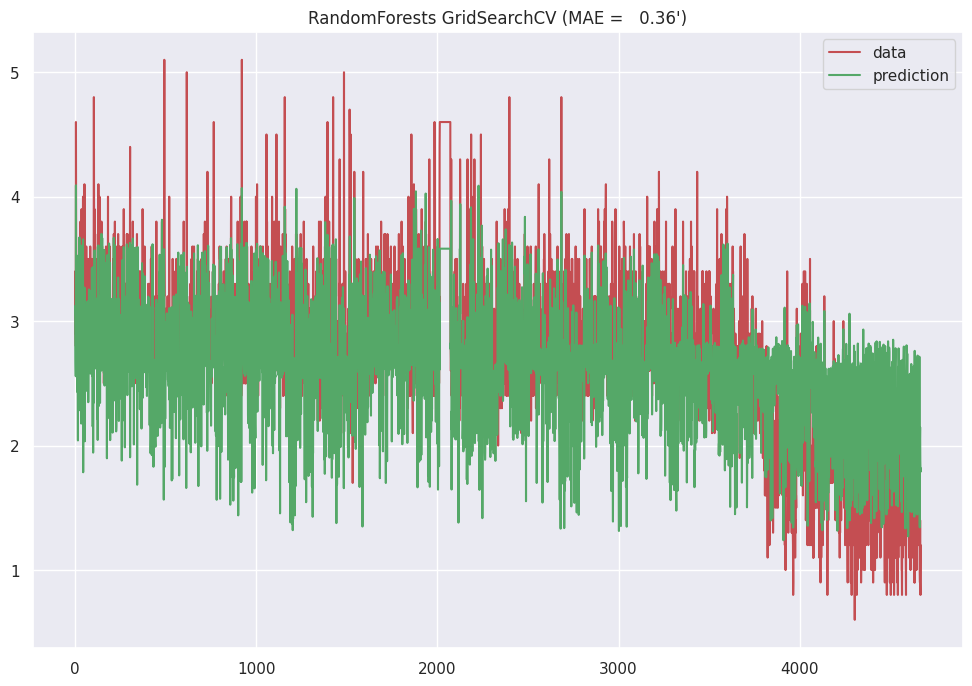

In [51]:
from sklearn.metrics import mean_absolute_error


# x axis for plotting
import numpy as np
xx = np.stack([i for i in range(test['Magnitud'].shape[0])])
plt.plot(xx, test['Magnitud'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [52]:
print(train.values)

[[ 2.85661000e+01 -1.78807000e+01  1.66000000e+01 ...  1.89000000e+02
   1.60000000e+00 -1.25555485e-01]
 [ 2.85584000e+01 -1.78508000e+01  4.67000000e+01 ...  1.49000000e+02
   2.70000000e+00 -1.93603288e-01]
 [ 2.85719000e+01 -1.78735000e+01  1.89000000e+01 ...  1.81000000e+02
   1.70000000e+00 -1.39373003e-01]
 ...
 [ 2.86025000e+01 -1.78335000e+01  4.20000000e+00 ...  1.05000000e+02
   2.40000000e+00 -7.42376995e-02]
 [ 2.85678000e+01 -1.78251000e+01  7.10000000e+00 ...  1.43000000e+02
   2.70000000e+00 -6.21360461e-02]
 [ 2.85660000e+01 -1.78549000e+01  1.05000000e+01 ...  1.28000000e+02
   3.00000000e+00 -8.20654229e-02]]


In [53]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ('Latitude','Longitude','Smaj','Az','Depth','ErrDepth','Nsta','Gap', ' pca_retemp'),
              'Decision Tree': best_grid.feature_importances_})



Feature Relevancies


,Attributes,Decision Tree
0,Latitude,0.113939
1,Longitude,0.007018
2,Smaj,0.080345
3,Az,0.146823
4,Depth,0.071189
5,ErrDepth,0.036801
6,Nsta,0.337547
7,Gap,0.049738
8,pca_retemp,0.156600


## RandomizedSearch

Para utilizar RandomizedSearchCV, primero necesitamos crear el conjunto de parámetros a muestrear durante el proceso de optimización.

In [54]:
param_dist = {"n_estimators": [4, 8, 16, 32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [16, 12,8,4, 2,None], # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["mse", "absolute_error"]}

n cada iteración, el algoritmo elegirá una combinación diferente de las características. Si se probaran de forma exhaustiva todas las características el problema se volvería muy costoso computacionalmente. Al menos al utilizar búsqueda aleatoria se seleccionará al azar una muestra de las mismas para buscar en un reducido pero significativo rango de valores.


Los argumentos más importantes en RandomizedSearchCV son *n_iter*, que controla el número de combinaciones diferentes a probar, y *cv*, que es el número de *cruces* a usar para la validación cruzada. Más iteraciones cubrirán un espacio de búsqueda más amplio y más *cruces* de cv reducen las posibilidades de sobreaprendizaje, pero al aumentar cada una de ellas se incrementará el tiempo de ejecución.

Vamos a ejecutarla utilizando la validación cruzada (5-fold) y posteriormente busca entre 100 combinaciones diferentes de entre las especificadas

In [55]:
rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist,
                               n_iter = 100, cv = 5, random_state=0, n_jobs = -1)

# Fit the random search model
rnd_regres.fit(X = train.drop(['Magnitud'], axis=1),
                           y = train['Magnitud'])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
355 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'absolute_error'],
                                        'max_depth': [16, 12, 8, 4, 2, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c034b4b2b60>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c034b52cdf0>,
                                        'n_estimators': [4, 8, 16, 32, 64,
                                                         128]},
                   random_state=0)

In [56]:
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.213 (std: 1.191)
Parameters: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 18, 'n_estimators': 4}

Model with rank: 2
Mean validation score: 0.210 (std: 1.193)
Parameters: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 16}

Model with rank: 3
Mean validation score: 0.147 (std: 1.338)
Parameters: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 22, 'n_estimators': 128}

Model with rank: 4
Mean validation score: 0.089 (std: 1.455)
Parameters: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 43, 'n_estimators': 32}

Model with rank: 5
Mean validation score: 0.019 (std: 1.591)

In [57]:
rnd_regres.best_params_

{'bootstrap': False,
 'criterion': 'absolute_error',
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 18,
 'n_estimators': 4}

Una vez que hemos identificado la mejor parametrización vamos a pasar a hacer una ejecución del modelo y vamos graficar sus resultados.

Recordamos que al final del paso 1 hemos dividido en entrenamiento/tuneado y test

Posteriormente, vamos a ejecutar el modelo con la mejor parametrización que hayamos obtenido anteriormente

In [58]:
# choose the best

best_random = rnd_regres.best_estimator_
# fit and predict
best_random.fit( X = train.drop(['Magnitud'], axis=1), y = train['Magnitud'])
y_pred = best_random.predict(X = test.drop(['Magnitud'], axis = 1))

# EVALUATE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Magnitud'], y_pred)
print ('MAE', mae)

# EVALUATE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Magnitud'], y_pred)
print ('MSE', mse)


# EVALUATE
import math
rmse = math.sqrt(mse)
print ('RMSE', rmse)

MAE 0.3871251874062968
MSE 0.2790977390768901
RMSE 0.5282970178572751


Por último probamos visualizamos como ha quedado nuestra predicción con la realidad.

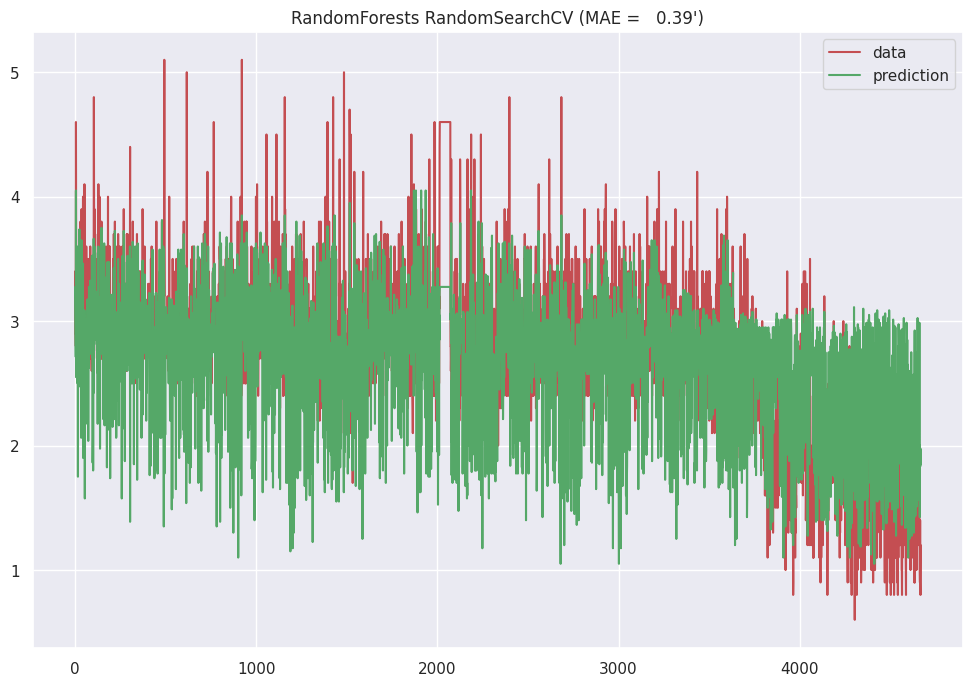

In [59]:
from sklearn.metrics import mean_absolute_error


# x axis for plotting
import numpy as np
xx = np.stack([i for i in range(test['Magnitud'].shape[0])])
plt.plot(xx, test['Magnitud'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [60]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ('Latitude','Longitude','Smaj','Az','Depth','ErrDepth', 'Nsta','Gap',' pca_retemp') ,
              'Random Forests': best_random.feature_importances_})

Feature Relevancies


,Attributes,Random Forests
0,Latitude,0.039029
1,Longitude,0.025351
2,Smaj,0.031791
3,Az,0.069419
4,Depth,0.084953
5,ErrDepth,0.052818
6,Nsta,0.329764
7,Gap,0.127421
8,pca_retemp,0.239453
